In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [16]:
heart=pd.read_csv("SAheart.csv")
heart

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Yes
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Yes
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Yes
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Yes
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,No
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,Yes
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,No
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,No


In [17]:
heart.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000


In [18]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 36.2+ KB


In [19]:
#How many records are present in the dataset? Use the appropriate functions to have an overview of the dataset

heart.shape

(462, 10)

In [20]:
#Retrieve sbp, alcohol, chd columns. Sort it in the descending order of sbp. Retrieve the first 8 rows.

heart[["sbp","alcohol","chd"]].sort_values("sbp",ascending=False).head(8)

,sbp,alcohol,chd
397,218,90.93,Yes
413,216,0.51,Yes
457,214,0.00,No
219,208,7.85,No
161,208,33.07,Yes
403,208,24.27,Yes
282,206,6.17,Yes
10,206,56.06,Yes


In [21]:
#Retrieve the persons younger than 40 and having a family history of the disease. Using appropriate functions.
#Find how many of these persons have the disease and do not have the disease. 

k=heart[(heart["age"]<40) & (heart["famhist"]=="Present")]
k.value_counts("chd")

chd
No     37
Yes    13
Name: count, dtype: int64

# If you used plt.plot() instead of plt.scatter() to create your plot and found the output not desirable, it could be due to the differences between these two types of plots and how they visualize data.

Here are some reasons why plt.plot() might not produce the desired output compared to plt.scatter():

Different Visualization Methods: plt.plot() connects the data points with lines, while plt.scatter() plots individual points without connecting them. Depending on the distribution of your data, one method might be more appropriate than the other.

Data Structure: plt.plot() assumes that the data points are ordered, as it connects them with lines. If your data points are not ordered or if they represent categorical data, plt.plot() might not produce the intended visualization.

Outlier Identification: Outliers might be less visible in plots created using plt.plot() compared to plt.scatter(). With plt.scatter(), outliers are represented as individual points, making them more apparent in the plot.

Performance: Depending on the amount of data you have, plt.plot() might be slower to render compared to plt.scatter() because it needs to draw lines between each data point.

If you're visualizing data where individual data points are important and you want to highlight the presence of outliers, plt.scatter() is often a better choice. On the other hand, if you're visualizing ordered data or trends, plt.plot() might be more suitable.






Text(0, 0.5, 'Alcohol Consumption')

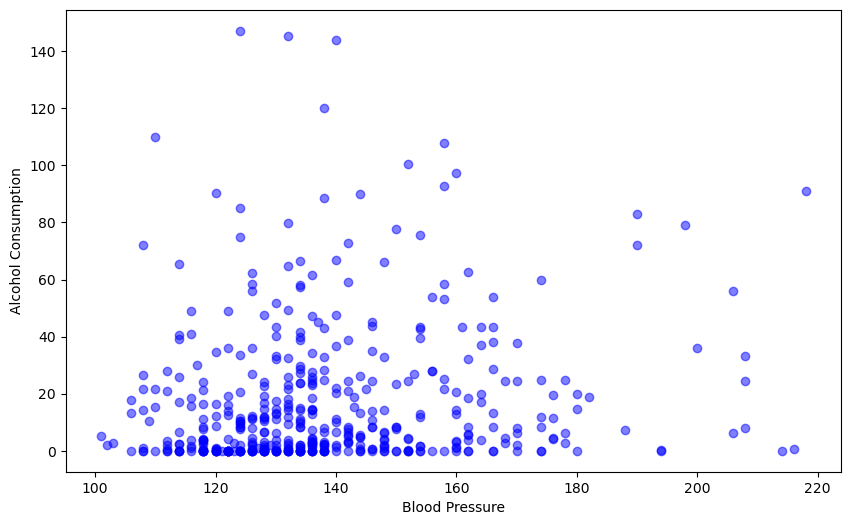

In [22]:
#Is there any relationship between sbp and alcohol? Answer using an appropriate plot. Do you observe any outlier in the plot?

plt.figure(figsize=(10, 6))
plt.scatter("sbp","alcohol",alpha=0.5,data=heart,color="b");
plt.xlabel("Blood Pressure")
plt.ylabel("Alcohol Consumption")

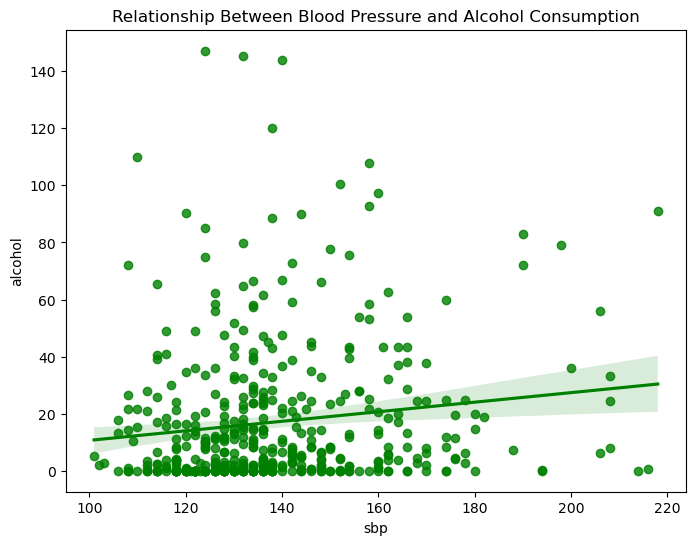

In [23]:
plt.figure(figsize=(8, 6))
sns.regplot(x="sbp",y="alcohol",data=heart,color="g");
plt.title("Relationship Between Blood Pressure and Alcohol Consumption")
plt.show()

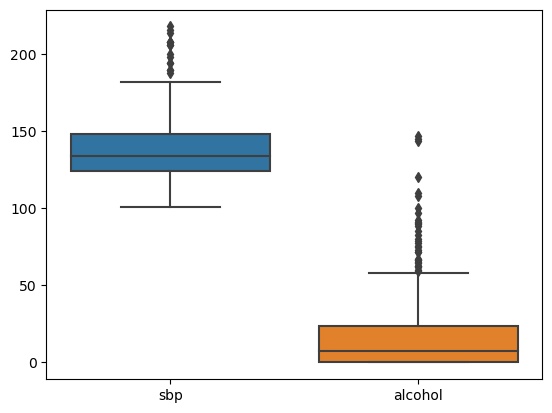

In [24]:
box=sns.boxplot(heart[["sbp","alcohol"]])

In [25]:
#Find the number of persons with and without CHD. Find the number of persons with and without a family history of the disease. 
#How many persons have both the disease and family history of the disease? 

heart[(heart["famhist"]=="Present") & (heart["chd"]=="Yes")].groupby(["chd","famhist"])[["famhist"]].count()

,,famhist
chd,famhist,
Yes,Present,96


In [26]:
l=heart.groupby(["chd","famhist"])[["famhist","chd"]].count()

In [27]:
l

famhist  chd
chd famhist              
No  Absent       206  206
    Present       96   96
Yes Absent        64   64
    Present       96   96

In [28]:
heart.groupby(["chd"])[["chd"]].count()

,chd
chd,
No,302
Yes,160


In [29]:
heart.groupby(["famhist"])[["famhist"]].count()

,famhist
famhist,
Absent,270
Present,192


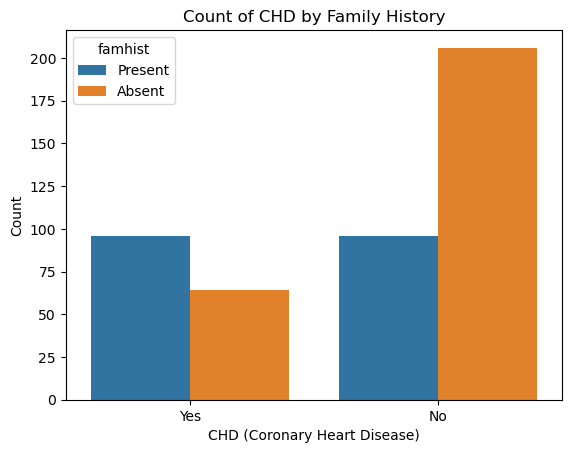

In [30]:
#Draw a bar plot to show the number of persons having CHD or not in comparison to those having 
#family history of the disease or not. Interpret the plot.

sns.countplot(x="chd", hue="famhist", data=heart)
plt.title('Count of CHD by Family History')
plt.xlabel('CHD (Coronary Heart Disease)')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Tobacco Consumotion In Comparison With Having CHD or Not')

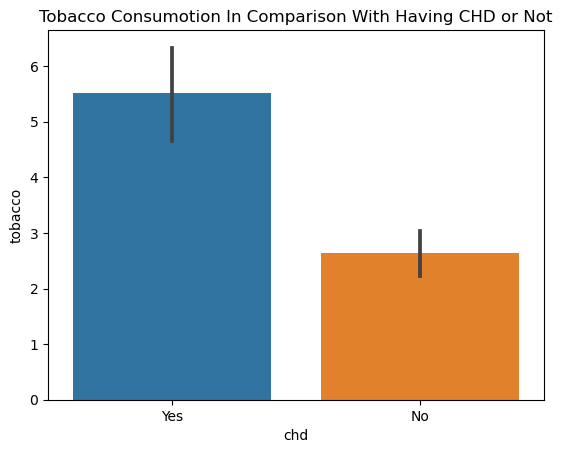

In [31]:
#Compare the distribution of tobacco consumption for persons having CHD and not having CHD.
#Can you interpret the effect of tobacco consumption on having coronary heart disease?

sns.barplot(x="chd",y="tobacco",data=heart);
plt.title("Tobacco Consumotion In Comparison With Having CHD or Not")

#Those who have chd tend to comsume tobacco more 

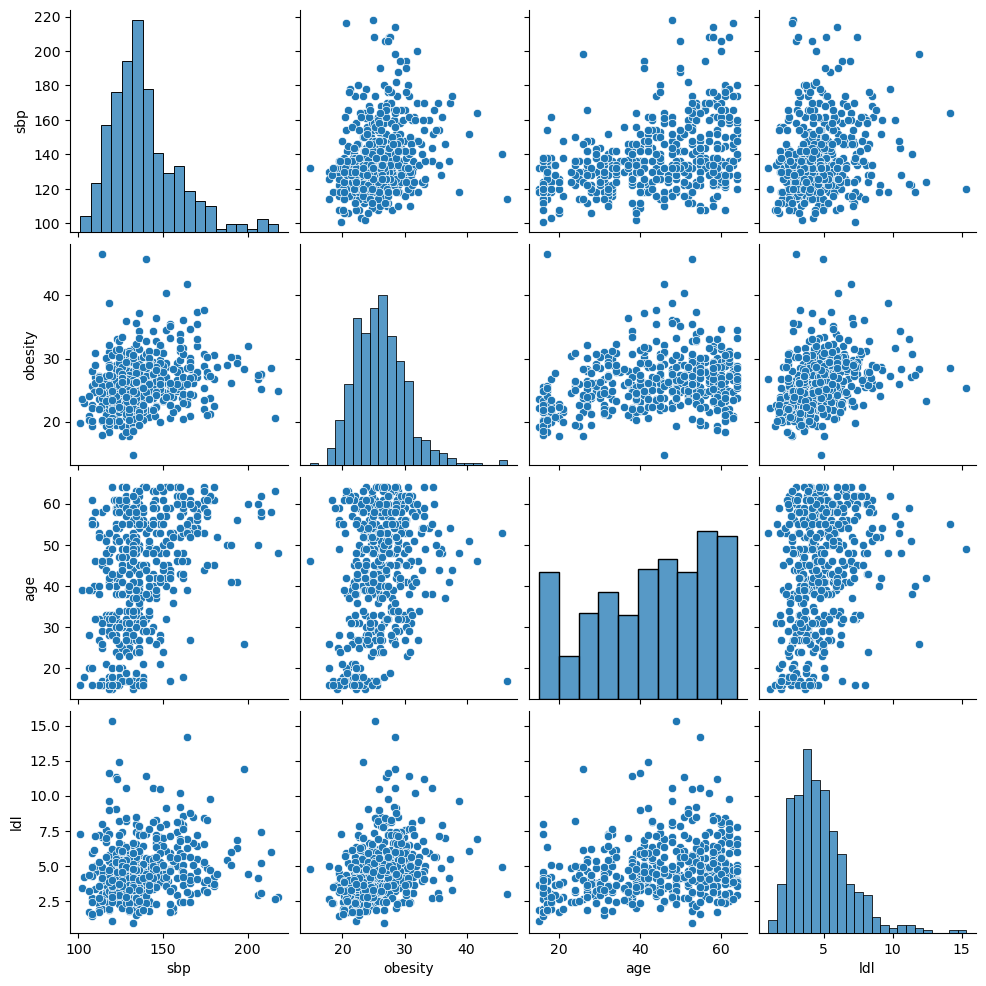

In [32]:
#How are the parameters sbp, obesity, age and ldl correlated? Choose appropriate plot to analyze the relationship

variables = ["sbp", "obesity", "age", "ldl"]
sns.pairplot(heart[variables], diag_kind='hist');

In [33]:
for index,row in heart.iterrows():
    if row["age"]<=18:
        heart.at[index,"Age Group"]="Young"
    elif row["age"]<=35:
        heart.at[index,"Age Group"]="Adult"
    elif row["age"]<=55:
        heart.at[index,"Age Group"]="Mid"
    else:
        heart.at[index,"Age Group"]="Old"

In [34]:
heart

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,Age Group
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Yes,Mid
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Yes,Old
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No,Mid
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Yes,Old
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Yes,Mid
...,...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,No,Old
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,Yes,Mid
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,No,Mid
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,No,Mid


In [35]:
#Find out the number of CHD cases in different age categories. 
#Draw a barplot and sort them in the order of age groups. Interpret the plot.

heart.groupby(["chd","Age Group"])[["Age Group"]].count()

Age Group
chd Age Group           
No  Adult             79
    Mid              123
    Old               53
    Young             47
Yes Adult             17
    Mid               81
    Old               61
    Young              1

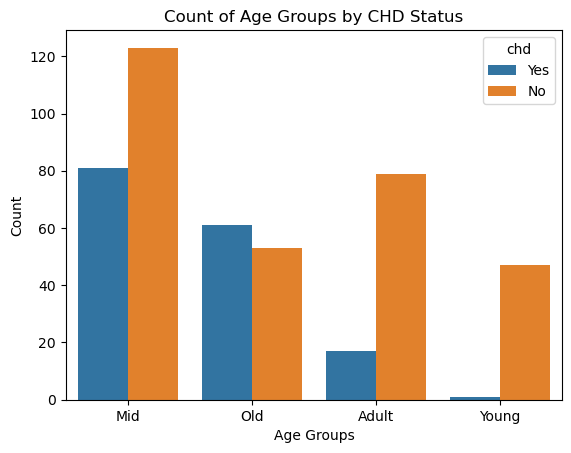

In [36]:
sns.countplot(x="Age Group",hue="chd",data=heart)
plt.title('Count of Age Groups by CHD Status')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

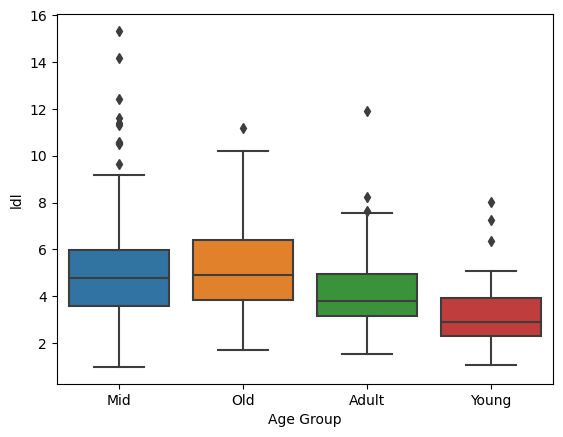

In [37]:
#Draw a box plot to compare distributions of ldl for different age groups. Interpret the plot.

sns.boxplot(x="Age Group",y="ldl",data=heart);

#Age level and colestrol likely to have positive corr. Mid age have significant level of externalities

In [39]:
book=pd.read_csv("bestsellers.csv")
book.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


<Axes: xlabel='Reviews', ylabel='Count'>

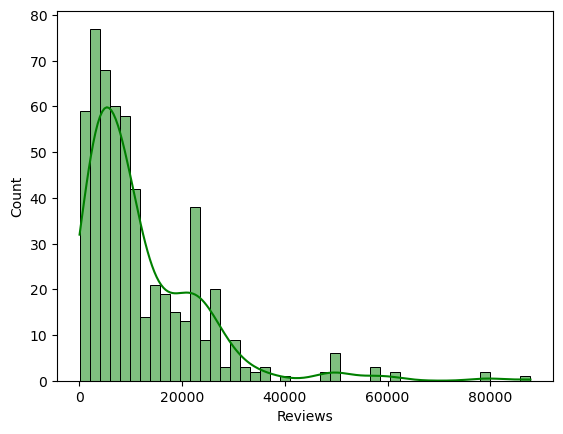

In [50]:
#Create a distribution plot for “Reviews”.
sns.histplot(book["Reviews"], kde=True, color="green",bins=45)

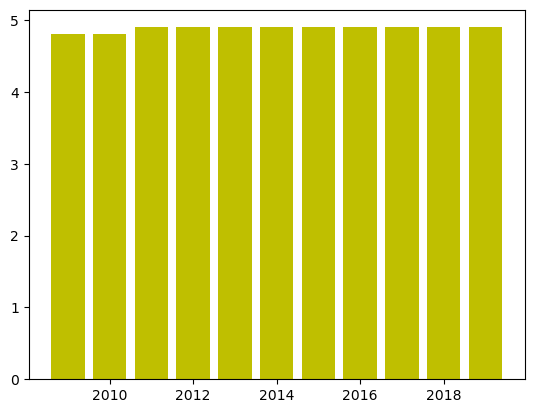

In [59]:
#Create a bar chart to understand how “User Rating” changes with “Year”. 
#Create another bar chart to understand how “Reviews” changes with “Year”. Comment on the charts

plt.bar(book["Year"],book["User Rating"],label="User Rating",color="y");

<BarContainer object of 550 artists>

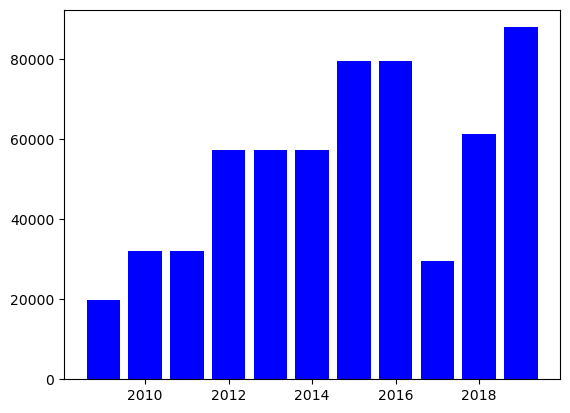

In [61]:
plt.bar(book["Year"],book["Reviews"],label="Reviews",color="b")

<Figure size 1400x600 with 0 Axes>

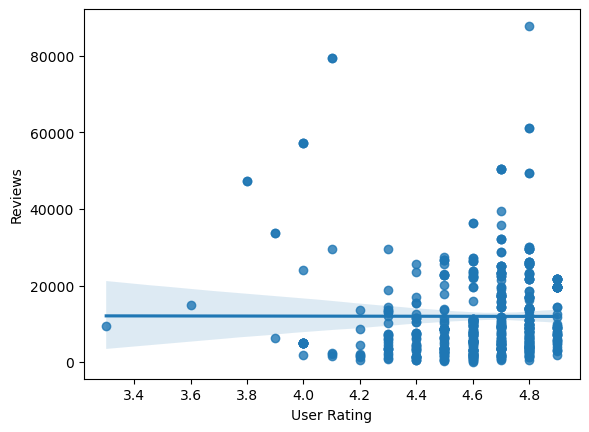

<Figure size 1400x600 with 0 Axes>

In [80]:
#Create a scatter plot of “Reviews” and “User Rating”. Comment on the relationship between these variables.
sns.regplot(x=book["User Rating"],y=book["Reviews"])
plt.figure(figsize=(14,6))

#seems no rship btw variables. Number of reviews have no impact on user rating